<a href="https://colab.research.google.com/github/minshuing/dbt-sunny/blob/main/%5BProject%5D_1_Agentic_Prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interactive Story Generation
### 프롬프트로 소설 작성하기
* 사용자가 이야기의 테마나 배경을 입력하면, 그에 맞는 스토리 윤곽을 만들어주고, 중요한 전환점마다 사용자가 선택을 할 수 있게 하는 방식입니다.
* 프롬프트 체이닝과 에이전트의 자율적 의사결정 같은 핵심 개념들을 직접 체험해볼 수 있습니다.


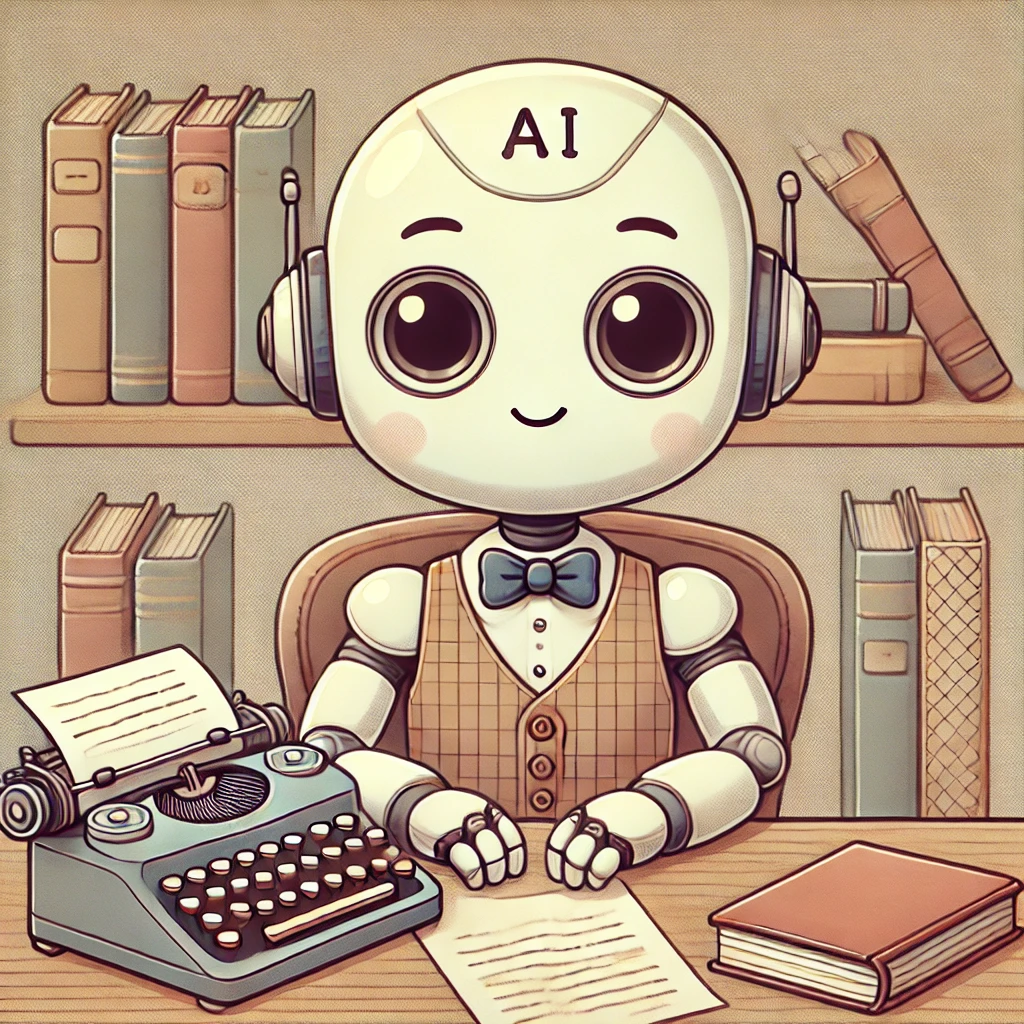

In [ ]:
# library 제작
!pip install openai

## 구현
### 첫 단계 (윤곽 생성)
* 사용자가 이야기의 주제를 입력하면, 에이전트가 이를 바탕으로 전체 이야기의 개요(윤곽)를 작성합니다.
(예: "어느 날, 신비한 섬에서 모험을 시작하게 된 주인공의 이야기")

### 중간 단계 (선택의 전환점)
* 스토리의 특정 구간에서 전환점을 설정하고, 사용자에게 두 가지 이상의 선택지를 제시합니다.
이를 통해 스토리가 분기되며, 각 선택에 따라 다른 이야기 내용이 생성됩니다.

### 최종 단계 (스토리 완성 및 평가)
* 선택에 따라 생성된 여러 스토리 조각들을 합쳐서 최종 이야기를 완성합니다.
필요하다면, 간단한 평가 단계(예: "이 부분을 좀 더 감동적으로 바꿔줘")를 추가하여 출력 결과를 다듬어볼 수 있습니다.

In [ ]:
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

In [ ]:
from openai import OpenAI
from collections import Counter

client = OpenAI()

### Ask 함수 활용

In [ ]:
from typing import List, Tuple

# 이미 구현된 ask 함수
def ask(question: str,
        message_history: List[dict] = None,
        model: str = "gpt-4o-mini",
        use_system: bool = True) -> Tuple[str, List[dict]]:
    """
    GPT API를 호출하여 답변을 받고, 대화 기록(message_history)을 업데이트하는 함수입니다.
    """
    if message_history is None:
        if use_system:
            message_history = [
                {
                    "role": "system",
                    "content": #TODO,
                }
            ]
        else:
            message_history = []

    # 사용자 질문 추가
    message_history.append({
        "role": "user",
        "content": #TODO,
    })

    # GPT API 호출 (client 객체는 미리 초기화되어 있다고 가정)
    completion = client.chat.completions.create(
        model=model,
        messages=#TODO,
    )

    # assistant 응답 추출
    answer = completion.choices[0].message.content
    message_history.append({
        "role": "assistant",
        "content": #TODO,
    })

    return answer, message_history

### Prompt chaining 함수 구현하기

In [ ]:
def prompt_chaining(initial_input: str, prompt_chain: List[str]) -> List[dict]:
    """
    입력과 여러 단계 프롬프트를 체이닝하여 최종 결과에 도달.
    반환값은 전체 message_history (List[dict]).
    """
    current_context = ""
    conversation_history: List[dict] = None

    for i, prompt in enumerate(prompt_chain, start=1):
        # 이전 응답을 맥락으로 계속 전달 prompt, current_context, initial_input
        final_prompt = #TODO

        answer, conversation_history = ask(
            final_prompt,
            message_history=conversation_history,
            model="gpt-5",
            use_system=True
        )

        # 다음 단계에서 활용할 맥락을 최신 응답으로 업데이트
        current_context = answer
        print(final_prompt, answer)

    return conversation_history

In [ ]:
theme = "여름 휴가를 떠나는 이야기를 작성해줘."
prompt_chain = [
    #TODO
]

history = prompt_chaining(theme, prompt_chain)
# 필요 시 마지막 응답만 출력
print("\n[최종 응답]\n", history[-1]["content"])


In [ ]:
history